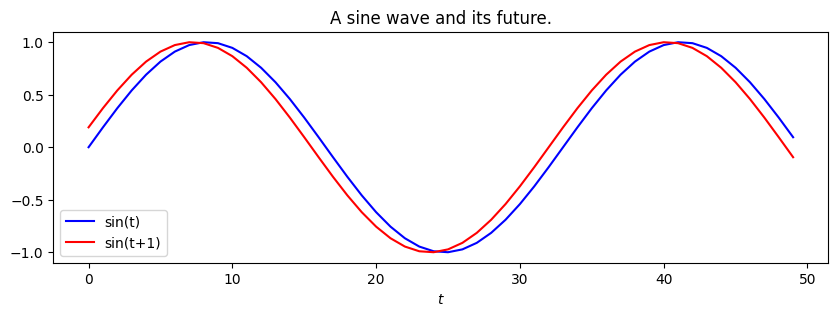

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Echo State Network class
class EchoStateNetwork:
    def __init__(self, input_size, reservoir_size, output_size, spectral_radius=0.9, sparsity=0.2, random_seed=42):
        np.random.seed(random_seed)
        
        self.input_size = input_size
        self.reservoir_size = reservoir_size
        self.output_size = output_size
        
        # Initialize input weights
        self.W_in = np.random.uniform(-1, 1, (reservoir_size, input_size))
        
        # Initialize reservoir weights
        W = np.random.uniform(-1, 1, (reservoir_size, reservoir_size))
        
        # Make the reservoir sparse
        mask = np.random.rand(reservoir_size, reservoir_size) < sparsity
        W *= mask
        
        # Adjust the spectral radius
        spectral_radius_current = np.max(np.abs(np.linalg.eigvals(W)))
        self.W = (W / spectral_radius_current) * spectral_radius
        
        # Initialize output weights (to be trained)
        self.W_out = None
    
    def _update_reservoir(self, X, prev_reservoir_state):
        """ Update the reservoir state given input X and previous state """
        # Ensure X is the correct shape (input_size, 1) and prev_reservoir_state is (reservoir_size, 1)
        X = X.reshape(-1, 1)
        prev_reservoir_state = prev_reservoir_state.reshape(-1, 1)
        
        pre_activation = np.dot(self.W_in, X) + np.dot(self.W, prev_reservoir_state)
        return np.tanh(pre_activation)  # Nonlinear activation (tanh)
    
    def fit(self, X_train, Y_train, reservoir_state=None):
        """ Train the ESN using ridge regression (or simple pseudo-inverse) """
        n_samples = X_train.shape[0]
        if reservoir_state is None:
            reservoir_state = np.zeros((self.reservoir_size, 1))  # Initial state
        
        # Collect reservoir states
        reservoir_states = np.zeros((n_samples, self.reservoir_size))
        
        for t in range(n_samples):
            X = X_train[t]
            reservoir_state = self._update_reservoir(X, reservoir_state)
            reservoir_states[t] = reservoir_state.ravel()  # Ensure it's the correct shape
        
        # Stack the reservoir states and input data
        extended_states = np.hstack([reservoir_states, X_train])
        
        # Train the output weights using pseudo-inverse
        self.W_out = np.dot(np.linalg.pinv(extended_states), Y_train)
    
    def predict(self, X_test, reservoir_state=None):
        """ Predict output for test data """
        n_samples = X_test.shape[0]
        if reservoir_state is None:
            reservoir_state = np.zeros((self.reservoir_size, 1))  # Initial state
        
        predictions = np.zeros((n_samples, self.output_size))
        
        for t in range(n_samples):
            X = X_test[t]
            reservoir_state = self._update_reservoir(X, reservoir_state)
            extended_state = np.hstack([reservoir_state.ravel(), X.ravel()])
            predictions[t] = np.dot(extended_state, self.W_out)
        
        return predictions

# Generate the time series data
X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)
X_train = X[:50]  # First 50 points as input
Y_train = X[1:51]  # Next 50 points as target (shifted by 1 step)

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(X_train, label="sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show()




In [2]:
# Create and train the Echo State Network
esn = EchoStateNetwork(input_size=1, reservoir_size=100, output_size=1)
esn.fit(X_train, Y_train)

# Predict on the training data (just to verify)
Y_pred = esn.predict(X_train)

# Print predicted values for comparison
for actual, predicted in zip(Y_train, Y_pred):
    print(f"Actual: {actual[0]:.4f}, Predicted: {predicted[0]:.4f}")

Actual: 0.1893, Predicted: 0.0000
Actual: 0.3717, Predicted: 0.3717
Actual: 0.5406, Predicted: 0.5406
Actual: 0.6901, Predicted: 0.6901
Actual: 0.8146, Predicted: 0.8146
Actual: 0.9096, Predicted: 0.9096
Actual: 0.9718, Predicted: 0.9718
Actual: 0.9989, Predicted: 0.9989
Actual: 0.9898, Predicted: 0.9898
Actual: 0.9450, Predicted: 0.9450
Actual: 0.8660, Predicted: 0.8660
Actual: 0.7557, Predicted: 0.7557
Actual: 0.6182, Predicted: 0.6182
Actual: 0.4582, Predicted: 0.4582
Actual: 0.2817, Predicted: 0.2817
Actual: 0.0951, Predicted: 0.0951
Actual: -0.0951, Predicted: -0.0951
Actual: -0.2817, Predicted: -0.2817
Actual: -0.4582, Predicted: -0.4582
Actual: -0.6182, Predicted: -0.6182
Actual: -0.7557, Predicted: -0.7557
Actual: -0.8660, Predicted: -0.8660
Actual: -0.9450, Predicted: -0.9450
Actual: -0.9898, Predicted: -0.9898
Actual: -0.9989, Predicted: -0.9989
Actual: -0.9718, Predicted: -0.9718
Actual: -0.9096, Predicted: -0.9096
Actual: -0.8146, Predicted: -0.8146
Actual: -0.6901, Predict

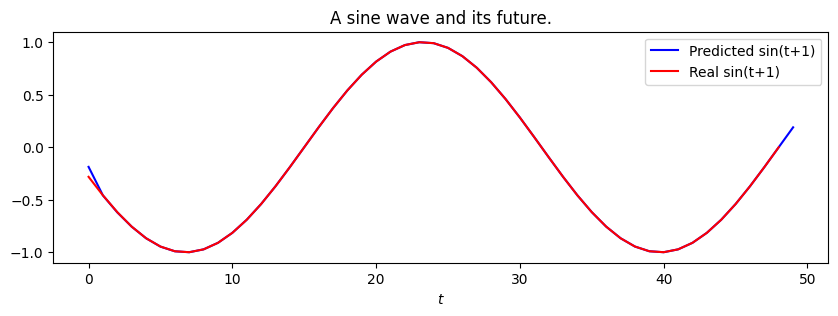

In [3]:
Y_pred_no_warm = esn.predict(X[50:])

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred_no_warm, label="Predicted sin(t+1)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()

In [4]:
class EchoStateNetwork:
    def __init__(self, input_size, reservoir_size, output_size, spectral_radius=0.9, sparsity=0.2, random_seed=42):
        np.random.seed(random_seed)
        
        self.input_size = input_size
        self.reservoir_size = reservoir_size
        self.output_size = output_size
        
        # Initialize input weights
        self.W_in = np.random.uniform(-1, 1, (reservoir_size, input_size))
        
        # Initialize reservoir weights
        W = np.random.uniform(-1, 1, (reservoir_size, reservoir_size))
        
        # Make the reservoir sparse
        mask = np.random.rand(reservoir_size, reservoir_size) < sparsity
        W *= mask
        
        # Adjust the spectral radius
        spectral_radius_current = np.max(np.abs(np.linalg.eigvals(W)))
        self.W = (W / spectral_radius_current) * spectral_radius
        
        # Initialize output weights (to be trained)
        self.W_out = None
    
    def _update_reservoir(self, X, prev_reservoir_state):
        """ Update the reservoir state given input X and previous state """
        # Ensure X is the correct shape (input_size, 1) and prev_reservoir_state is (reservoir_size, 1)
        X = X.reshape(-1, 1)
        prev_reservoir_state = prev_reservoir_state.reshape(-1, 1)
        
        pre_activation = np.dot(self.W_in, X) + np.dot(self.W, prev_reservoir_state)
        return np.tanh(pre_activation)  # Nonlinear activation (tanh)
    
    def fit(self, X_train, Y_train, warm_up_steps=10, reservoir_state=None):
        """ Train the ESN using ridge regression (or simple pseudo-inverse) with warm-up """
        n_samples = X_train.shape[0]
        if reservoir_state is None:
            reservoir_state = np.zeros((self.reservoir_size, 1))  # Initial state
        
        # Warm-up phase
        for t in range(warm_up_steps):
            X = X_train[t]
            reservoir_state = self._update_reservoir(X, reservoir_state)
        
        # Now collect the reservoir states after warm-up
        reservoir_states = np.zeros((n_samples - warm_up_steps, self.reservoir_size))
        
        for t in range(warm_up_steps, n_samples):
            X = X_train[t]
            reservoir_state = self._update_reservoir(X, reservoir_state)
            reservoir_states[t - warm_up_steps] = reservoir_state.ravel()  # Ensure it's the correct shape
        
        # Stack the reservoir states and input data
        extended_states = np.hstack([reservoir_states, X_train[warm_up_steps:]])
        
        # Train the output weights using pseudo-inverse
        self.W_out = np.dot(np.linalg.pinv(extended_states), Y_train[warm_up_steps:])
    
    def predict(self, X_test, warm_up_steps=10, reservoir_state=None):
        """ Predict output for test data with warm-up """
        n_samples = X_test.shape[0]
        if reservoir_state is None:
            reservoir_state = np.zeros((self.reservoir_size, 1))  # Initial state
        
        # Warm-up phase
        for t in range(warm_up_steps):
            X = X_test[t]
            reservoir_state = self._update_reservoir(X, reservoir_state)
        
        # Prediction after warm-up
        predictions = np.zeros((n_samples - warm_up_steps, self.output_size))
        
        for t in range(warm_up_steps, n_samples):
            X = X_test[t]
            reservoir_state = self._update_reservoir(X, reservoir_state)
            extended_state = np.hstack([reservoir_state.ravel(), X.ravel()])
            predictions[t - warm_up_steps] = np.dot(extended_state, self.W_out)
        
        return predictions

# Generate the time series data
X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)
X_train = X[:50]  # First 50 points as input
Y_train = X[1:51]  # Next 50 points as target (shifted by 1 step)

# Create and train the Echo State Network
esn = EchoStateNetwork(input_size=1, reservoir_size=100, output_size=1)

# Train with warm-up (e.g., warm up for 10 steps)
warm_up_steps = 10
esn.fit(X_train, Y_train, warm_up_steps=warm_up_steps)

# Predict on the training data (just to verify)
Y_pred = esn.predict(X_train, warm_up_steps=warm_up_steps)

# Print predicted values for comparison
for actual, predicted in zip(Y_train[warm_up_steps:], Y_pred):
    print(f"Actual: {actual[0]:.4f}, Predicted: {predicted[0]:.4f}")

Actual: 0.8660, Predicted: 0.8660
Actual: 0.7557, Predicted: 0.7557
Actual: 0.6182, Predicted: 0.6182
Actual: 0.4582, Predicted: 0.4582
Actual: 0.2817, Predicted: 0.2817
Actual: 0.0951, Predicted: 0.0951
Actual: -0.0951, Predicted: -0.0951
Actual: -0.2817, Predicted: -0.2817
Actual: -0.4582, Predicted: -0.4582
Actual: -0.6182, Predicted: -0.6182
Actual: -0.7557, Predicted: -0.7557
Actual: -0.8660, Predicted: -0.8660
Actual: -0.9450, Predicted: -0.9450
Actual: -0.9898, Predicted: -0.9898
Actual: -0.9989, Predicted: -0.9989
Actual: -0.9718, Predicted: -0.9718
Actual: -0.9096, Predicted: -0.9096
Actual: -0.8146, Predicted: -0.8146
Actual: -0.6901, Predicted: -0.6901
Actual: -0.5406, Predicted: -0.5406
Actual: -0.3717, Predicted: -0.3717
Actual: -0.1893, Predicted: -0.1893
Actual: -0.0000, Predicted: -0.0000
Actual: 0.1893, Predicted: 0.1893
Actual: 0.3717, Predicted: 0.3717
Actual: 0.5406, Predicted: 0.5406
Actual: 0.6901, Predicted: 0.6901
Actual: 0.8146, Predicted: 0.8146
Actual: 0.9096

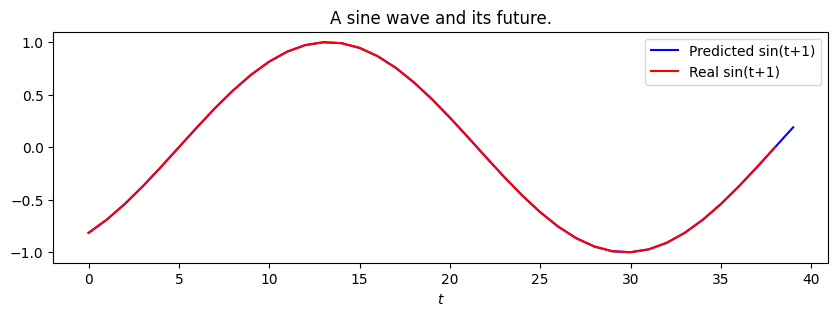

In [5]:
Y_pred_warm = esn.predict(X[50:])

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred_warm, label="Predicted sin(t+1)", color="blue")
plt.plot(X[61:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()


In [6]:
# calc accuracy
from sklearn.metrics import mean_squared_error
mse_no_warm = mean_squared_error(X[51:], Y_pred_no_warm[:-1])
mse_warm = mean_squared_error(X[61:], Y_pred_warm[:-1])
print(f'Mean Squared Error: {mse_no_warm}')
print(f'Mean Squared Error with warm-up: {mse_warm}')

print(mse_no_warm / mse_warm)

Mean Squared Error: 0.00018298819216219415
Mean Squared Error with warm-up: 8.767145333970859e-11
2087203.8182503155
